# igraph louvain experiments


ref:
- [tutorial](https://igraph.org/python/doc/tutorial/tutorial.html)
- [GraphBase modularity](https://igraph.org/python/doc/igraph.GraphBase-class.html#modularity)
    * membership argument is a list of vertex index
    * weights is a list of edge weights
- [Graph modularity](https://igraph.org/python/doc/igraph.Graph-class.html#modularity)
    * membership can be a list or a VertexClustering obj
- [clustering](https://igraph.org/python/doc/igraph.clustering.Clustering-class.html)
    * use VertexClustering instead, it has more functionality
- [VertexClustering](https://igraph.org/python/doc/igraph.clustering.VertexClustering-class.html)
    * cluster_graph() Returns a graph where each cluster is contracted into a single vertex.
    * subgraph() ???
- [VertexSeq](https://igraph.org/python/doc/igraph.VertexSeq-class.html)
- [cover](https://igraph.org/python/doc/igraph.clustering.Cover-class.html)
    * Covers are similar to clusterings, but each element of the set may belong to more than one cluster in a cover, and elements not belonging to any cluster are also allowed
 

In [1]:
import igraph as ig
print("igraph version:{}".format(ig.__version__))

import numpy as np

igraph version:0.7.1


# How to graphs and clusters work?

## create social graph from tutorial

In [2]:
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])
    
# add attributes to the vertices
g.vs["name"] = \
    ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]

# add attributes to the edges
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

In [3]:
print(g)

IGRAPH UN-- 7 9 --
+ attr: age (v), gender (v), name (v), is_formal (e)
+ edges (vertex names):
 Alice -- Bob, Claire, Frank             Esther -- Claire, Dennis
   Bob -- Alice                           Frank -- Alice, Claire, George
Claire -- Alice, Dennis, Esther, Frank   George -- Dennis, Frank
Dennis -- Claire, Esther, George


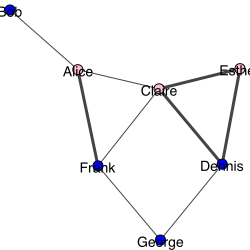

In [4]:
layout = g.layout("kk")

visual_style = {}
visual_style["vertex_size"] = 10
color_dict = {"m": "blue", "f": "pink"}
visual_style["vertex_color"] = [color_dict[gender] for gender in g.vs["gender"]]
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]]
visual_style["layout"] = layout
visual_style["bbox"] = (250, 250)
visual_style["margin"] = 10
ig.plot(g, **visual_style)

In [5]:
girls = ['Claire', 'Esther', 'Alice'] 
girlsVertexSeq = g.vs.select( lambda v: v["name"] in girls)
girlsVerticesIndicies = [v.index for v in girlsVertexSeq]
girlsVerticesIndicies

[0, 2, 4]

## graph modularity

In [6]:
# how does graph.modularity work
# does not look like we have access to the modularity code we will need to 
# write our own
#
# modularity membership is a list with length = number of nodes
# the value in the list corresponds to the cluster the node is

print("num vertices in graph:{}".format(g.vcount()))

# use numpy array. it makes it easy to change values
# using a list of idx
ml = np.zeros(g.vcount(), dtype = int)
print("ml:{}".format(ml))
print("\ngirlsVerticesIndicies:{}".format(girlsVerticesIndicies))
ml[girlsVerticesIndicies] = 1
print("\nml after assign girls to a seperate cluster\n{}".format(ml))


Q = g.modularity(membership=ml)
print("\nQ:{}".format(Q))

num vertices in graph:7
ml:[0 0 0 0 0 0 0]

girlsVerticesIndicies:[0, 2, 4]

ml after assign girls to a seperate cluster
[1 0 1 0 1 0 0]

Q:-0.05555555555555558


In [7]:
# graph.modularity() calls graphbase.modularity
# looks like we need to computer modularity our selves we can not use igraphs it implemented in c
# we can use it to test

## how do clusters, clustering work?

In [8]:
# looks like the membership list create 3 cluster e
clustering1 = ig.Clustering(membership=girlsVerticesIndicies)
print(clustering1)
# cluster = Clustering1[0]
# print()
# print(type(cluster))
# print(type(cluster[0]))
# print(cluster)
clustering1.summary(verbosity=1)

print()
for c in clustering1:
#     print(type(c)) list
    print("xxx c:{}".format(c))

Clustering with 3 elements and 5 clusters
[0] 0

[2] 1

[4] 2

xxx c:[0]
xxx c:[]
xxx c:[1]
xxx c:[]
xxx c:[2]


In [9]:
# use modularity_params to pass weight
# this does not work, membership is bad
# it is a list of len(g.vcount)
# values are the cluster id each vertice belongs to
#vc = ig.VertexClustering(g, membership=girlsVerticesIndicies, modularity_params=None)

## VertexClustering

In [10]:
# put each vertice in a seperate cluster
ml = [i for i in range(g.vcount())]
level0 = ig.VertexClustering(g,membership=ml)
print(level0)

Clustering with 7 elements and 7 clusters
[0] Alice
[1] Bob
[2] Claire
[3] Dennis
[4] Esther
[5] Frank
[6] George


In [11]:
# now create a new level with 2 clusters seperated by sex
#girlsVertexSeq = g.vs.select( lambda v: v["name"] in girls)
print(g.vs["gender"] )
weomanVertexSeq = g.vs.select(gender_eq='f')
weomanIndicies = [v.index for v in weomanVertexSeq]
print(weomanIndicies)


ml = np.zeros(g.vcount(), dtype=int)
ml[weomanIndicies] = 1
print("ml:{}".format(ml))
level1 = ig.VertexClustering(g,membership=ml)
print(level1)

['f', 'm', 'f', 'm', 'f', 'm', 'm']
[0, 2, 4]
ml:[1 0 1 0 1 0 0]
Clustering with 7 elements and 2 clusters
[0] Bob, Dennis, Frank, George
[1] Alice, Claire, Esther


In [12]:
#Returns a graph where each cluster is contracted into a single vertex.
glevel1 = level1.cluster_graph()
print(glevel1)
we lost the weights
try adding weights

SyntaxError: invalid syntax (<ipython-input-12-9e7c44824071>, line 4)

In [ ]:
print(level1[0])
print(level1[1])
print(level1[0].degrees())

# subgraphs
maybe not what we want, we get a sub graph on a cluster we a disjoint graph. ie edges to other clusters are lost

In [ ]:
clusterId = 0
l1Msubgraph = level1.subgraph(clusterId)
print(type(l1Msubgraph))
print(l1Msubgraph)

In [ ]:
clusterId = 1
l1Fsubgraph = level1.subgraph(clusterId)
print(type(l1Fsubgraph))
print(l1Fsubgraph)

In [ ]:
alice = g.vs.find(name='Alice')
print(alice)

print(alice.incident())   

In [ ]:
for e in g.es:
    print(e)
    
print("*********")
print(g.es[0].attributes())
print(g.es[0].tuple)

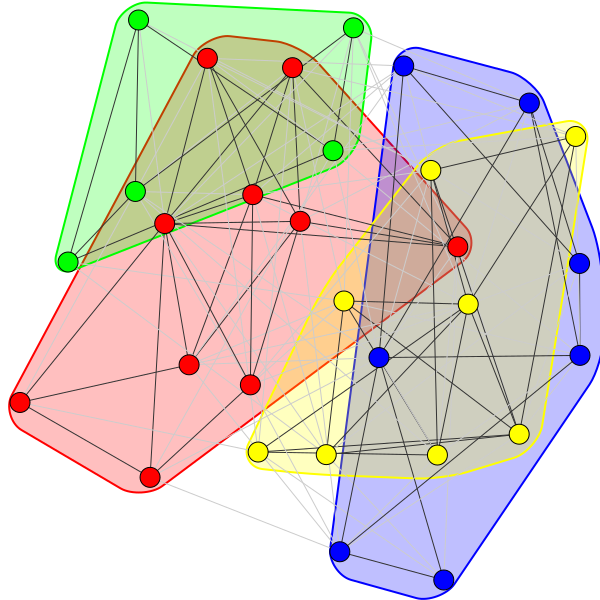

In [19]:
from igraph import *
import random
random.seed(1)


g = Graph.Erdos_Renyi(30,0.3)
# g = Graph.Erdos_Renyi(3,0.3)
comms = g.community_multilevel()
plot(comms, mark_groups = True)

In [20]:
print(type(comms))
l = list(comms)
l

<class 'igraph.clustering.VertexClustering'>


[[0, 1, 4, 7, 10, 11, 15, 20, 22, 28],
 [2, 3, 8, 13, 16],
 [5, 6, 18, 19, 23, 26, 29],
 [9, 12, 14, 17, 21, 24, 25, 27]]

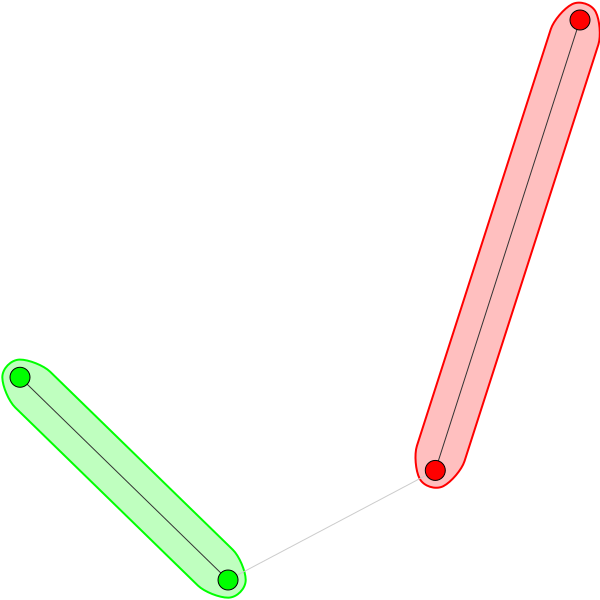

In [28]:
g2 = Graph.Tree(4, 2)
comms = g2.community_multilevel()
plot(comms, mark_groups = True)

In [31]:
print(list(comms))
ml = [i for i in range(g2.vcount())]
print(ml)
print(g2.modularity(ml))

[[0, 2], [1, 3]]
[0, 1, 2, 3]
-0.2777777777777778
